# STAGE 1. E-Commerce Dataset #Bukapedia
Kelompok 1: 
- Fildzah Zhafarina 
- Nabilah Nurul Fikri 
- Wahyuni 
- Sakti Hakim Nasution 
- Ryan Hardi 
- Alifian Darmawan 
- Tiurmauli Rahel Ernita

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [2]:
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read Dataset
df = pd.read_excel('/content/drive/MyDrive/Kelompok 1/Document /E Commerce Dataset.xlsx','E Comm')
data = df
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2250,52251,0,2.0,Mobile Phone,1,7.0,Debit Card,Female,2.0,4,Grocery,1,Married,4,0,14.0,NaN,1.0,7.0,261.24
867,50868,0,12.0,Computer,1,31.0,Debit Card,Male,3.0,3,Fashion,3,Divorced,4,0,21.0,0.0,1.0,5.0,209.20
1272,51273,0,27.0,Phone,1,15.0,Debit Card,Female,NaN,3,Laptop & Accessory,3,Married,4,0,11.0,0.0,2.0,3.0,128.97
698,50699,0,2.0,Computer,1,16.0,Debit Card,Female,3.0,3,Mobile,4,Married,1,0,14.0,1.0,1.0,1.0,132.91
3069,53070,0,29.0,Mobile Phone,1,9.0,Debit Card,Female,4.0,4,Grocery,2,Single,4,1,14.0,NaN,2.0,3.0,291.59


## Descriptive Statistics

In [5]:
#informasi general dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

cek kolom tipe data apakah sudah sesuai 

In [6]:
#cek missing value setiap kolom
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

1. Terdapat missing value di beberapa kolom seperti Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder
2. Tipe data sudah sesuai

In [8]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [9]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2750,52751,0,4.0,Computer,1,16.0,Credit Card,Female,2.0,3,Fashion,3,Married,5,0,20.0,3.0,4.0,NaN,210.31
4859,54860,0,26.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,4,Grocery,1,Married,4,0,NaN,4.0,8.0,9.0,295.99
1256,51257,0,NaN,Computer,1,22.0,CC,Male,2.0,3,Mobile,3,Single,2,0,14.0,0.0,1.0,4.0,121.44
1136,51137,0,11.0,Mobile Phone,1,24.0,Credit Card,Male,2.0,5,Laptop & Accessory,1,Married,4,1,16.0,0.0,1.0,0.0,158.11
1524,51525,0,NaN,Phone,1,15.0,Debit Card,Female,3.0,3,Mobile,1,Single,2,0,12.0,1.0,2.0,1.0,122.88


In [10]:
#memisahkan data tipe numerik dan kategorik
nums = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
        'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [11]:
#Statistika Summary Numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [12]:
#Statistika Summary Kategorikal
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


1. Dari summary numericals, tidak terlihat ada data yang aneh. Namun ada beberapa kolom yang skew.
2. Kolom churn dan complain ternyata bernilai boolean.
3. Dan dari summary categoricals pun tidak terlihat adanya keanehan data. Jumlah unik dari value kolomnya pun masih wajar, jadi tidak ada yang perlu didrop.

### Melihat Ketimpangan Data di Categoricals (Value Counting)

In [13]:
for col in cats:
  print(f'''Value count kolom{col}:''')
  print(df[col].value_counts())
  print()

Value count kolomPreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolomPreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolomGender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolomPreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolomMaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



## Univariate Analysis

In [14]:
#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [15]:
#memisahkan data tipe Kategorikal(Ordinal dan Nominal)
kategorikal_ordinal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
kategorikal_nominal = ['Churn', 'CityTier', 'SatisfactionScore','Complain']

### Individual Boxplot (kontinu_interval)

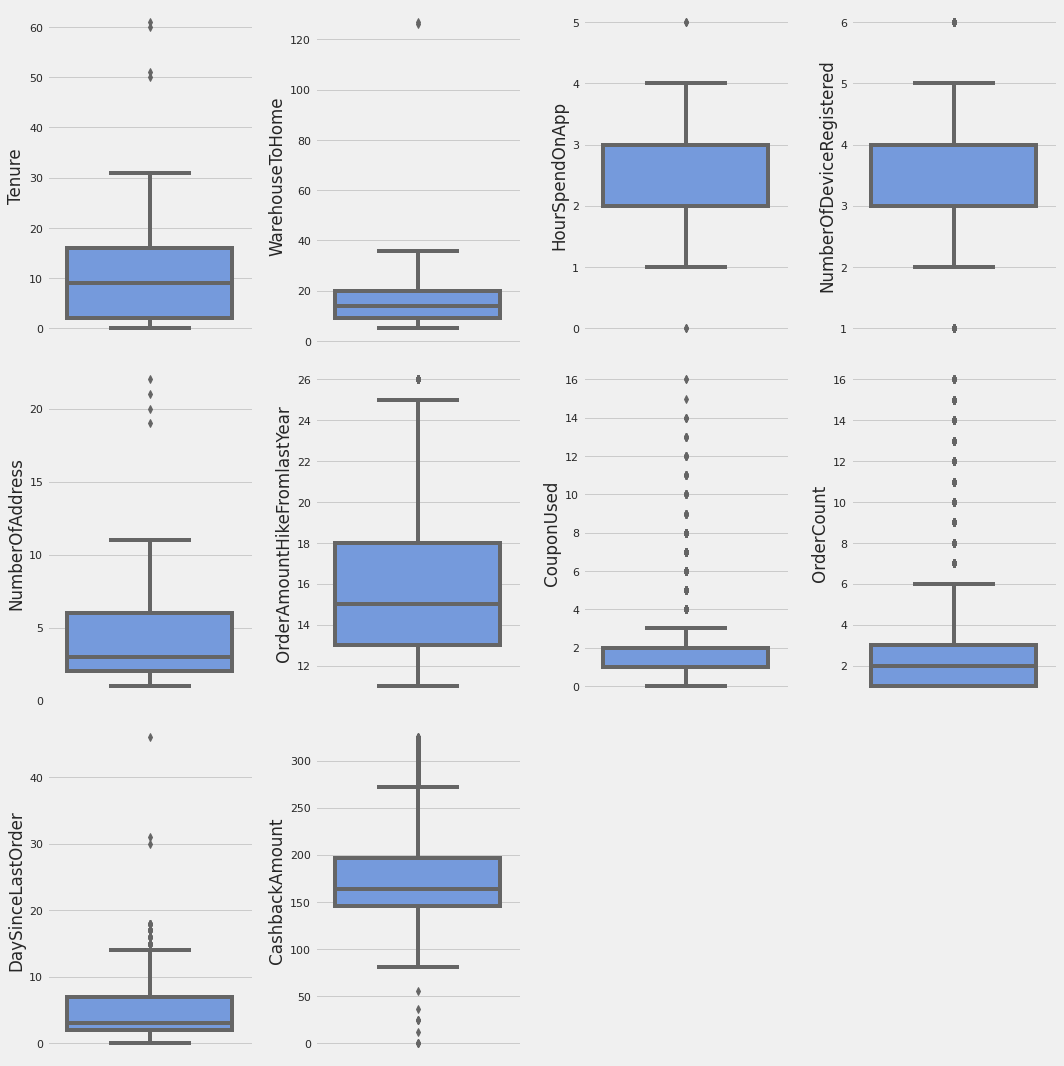

In [16]:
features = kontinu_interval
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()


1. Dari visualisasi boxplot di atas terdapat outlier yang sangat jauh jaraknya yaitu ada di kolom Tenure, WarehouseToHome, NumberOfAddress, dan DaySinceLastOrder.

2. Dan diketahui ada kolom yang menjalar skewed ke kanan yaitu Tenure, WarehouseToHome, NumberOfAddress, CouponUsed, OrderCount, dan DaySinceLastOrder.

### Individual Displot (kontinu_interval)

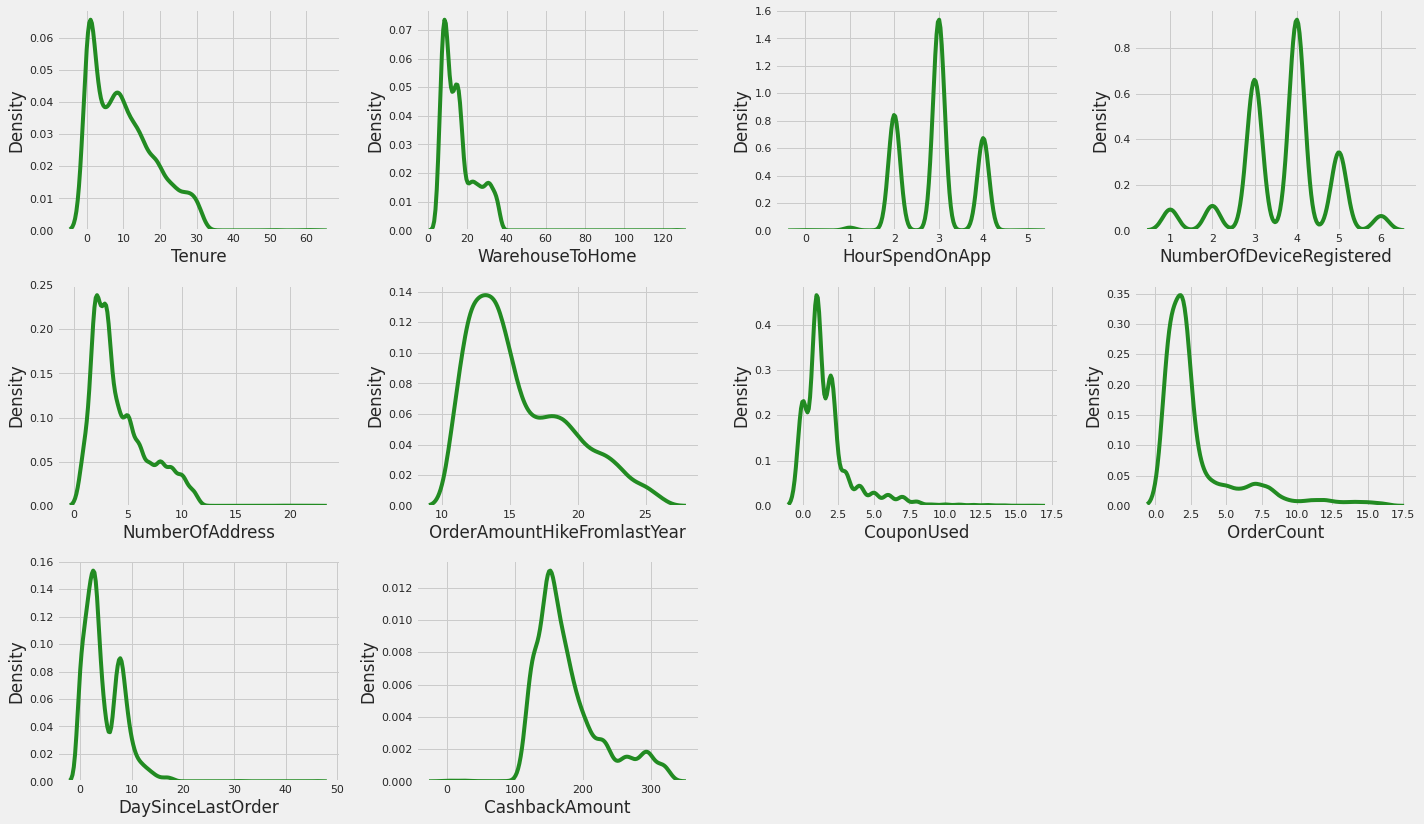

In [17]:
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

Dapat dilihat dari visualisasi displot di atas : 

1. Kolom `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder` dan `CashbackAmount` mempunyai grafik yang skewed ke kanan (positively skew) dan pada saat nanti melakukan data preprocesing dapat melakukan feature transformation dengan menggunakan log transformation.

2. Kolom `NumberOfDeviceRegistered` menunjukan customer cenderung login lebih dari 1 device.

3. Kolom `HourSpendOnAPP` memiliki modus di 3 jam



### Individual Countplot (kategorikal_ordinal)

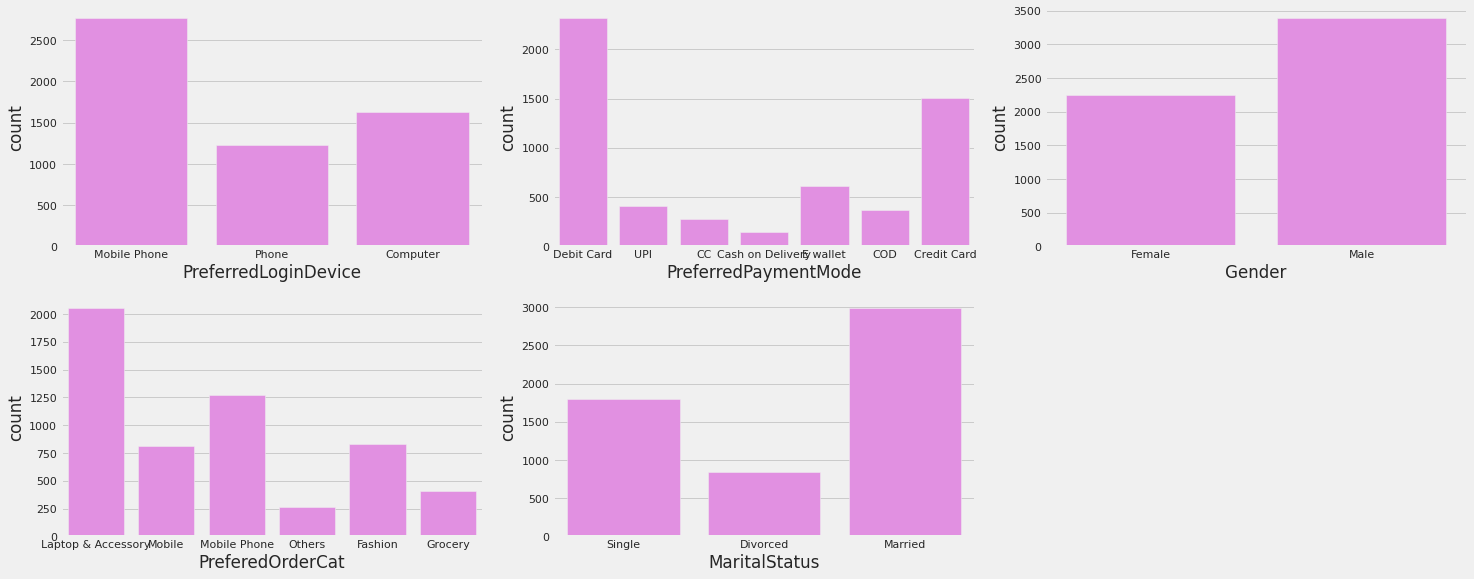

In [18]:
features = kategorikal_ordinal
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'violet')
  plt.tight_layout()

1. Kolom PrefferedLoginDevice mempunyai nilai yang mendominasi pada kategori Mobile Phone
2. Kolom PrefferedPaymentMode mempunyai nilai yang mendominasi pada 2 kategori yaitu Debit Card dan Credit Card
3. Kolom Gender mempunyai nilai yang mendominasi pada kategori Male
4. Kolom PreferedOrderCat mempunyai nilai yang mendominasi pada kategori Laptop & Accessory
5. Kolom MaritalStatus mempunyai nilai yang mendominast pada kategori Married

Saat nanti melakukan data preprocessing dapat melakukan feature encoding dengan menggunakan OHE (One Hot Encoding)

### Individual Countplot (kategorikal_numerikal)

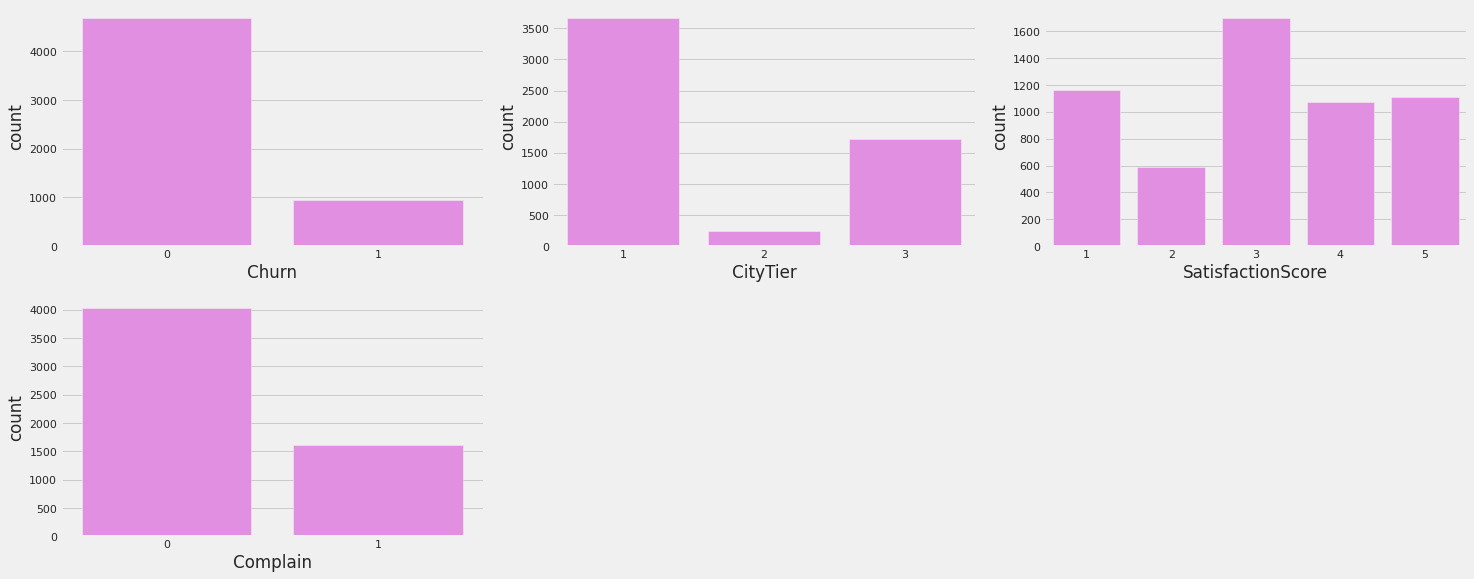

In [19]:
features = kategorikal_nominal
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'violet')
  plt.tight_layout()

1. Kolom `CityTier` menunjukan bahwa customer dengan katagori 1 mendominasi.
2. Kolom `SatisfactionScore` mempunyai nilai yang mendominasi pada angka 3.


## Multivariate Analysis

### Correlation Heatmap (Numeric)

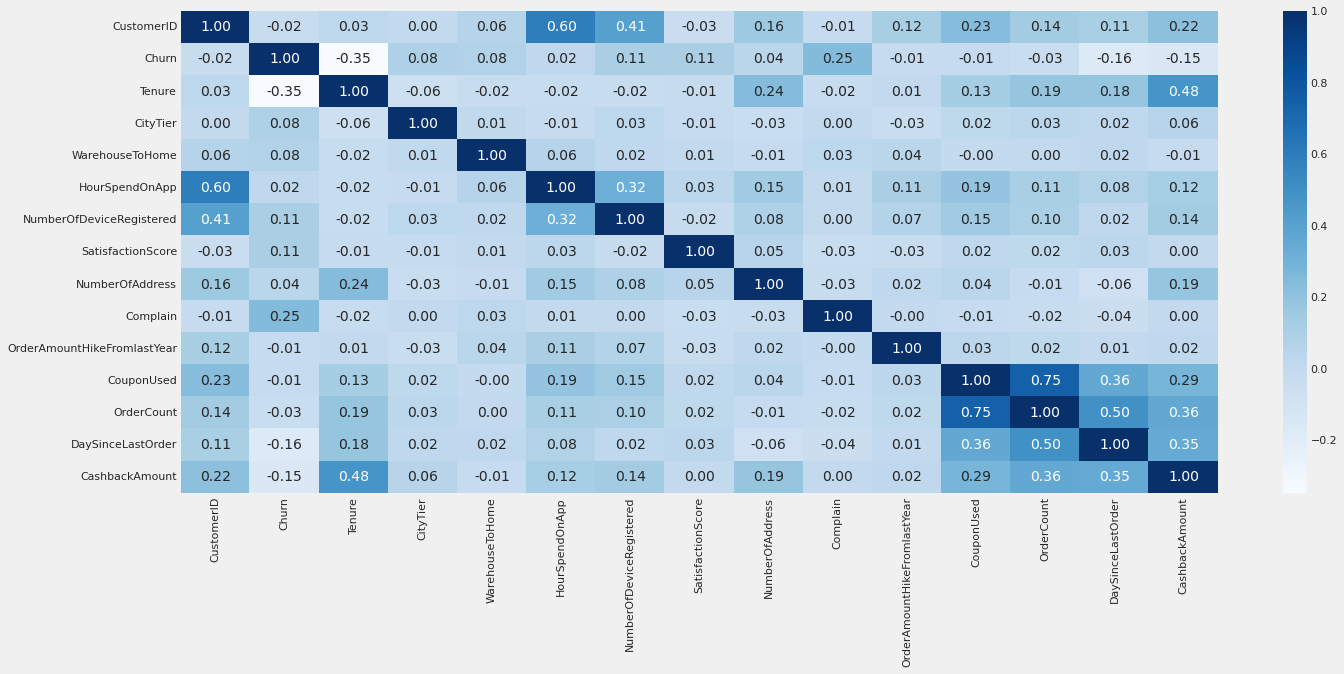

In [20]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari Visualisasi Heatmap di atas, terlihat bahwa : 
1. Target (Churn) memiliki kolerasi positif dengan `CityTier`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `Complain`
2. Target (Churn) memiliki kolerasi negatif `Tenure`,  `DaySinceLastOrder`, dan `CashbackAmount`.
3. Target (Churn) dengan `HourSpendOnApp`,`NumberOfAddress`, `OrderAmoundHikeFromlastYear`, `CouponUsed`, `OrderCount` memiliki kolerasi sangat lemah ~0, ini menandakan bisa jadi fitur tersebut tidak potensial
4. `OrderCount` memiliki kolerasi cukup kuat dengan `CouponUsed`. Hal tersebut bisa dikatakan redundant

### Korelasi antar Target dan Fitur

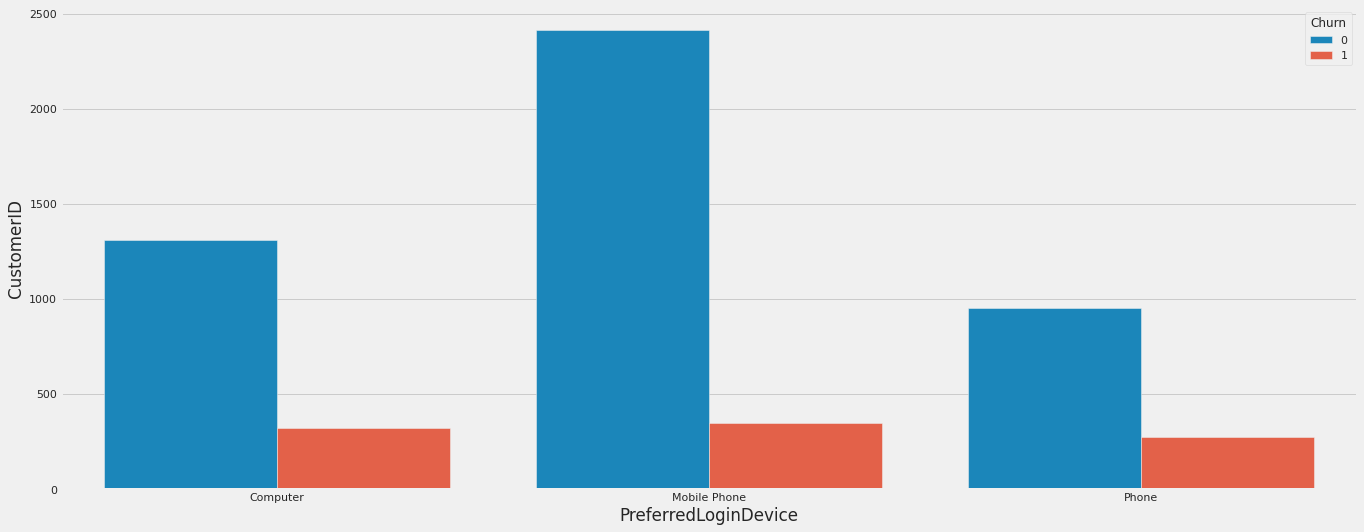

In [21]:
df9=df.groupby(['PreferredLoginDevice','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredLoginDevice', y ='CustomerID', hue='Churn', data=df9)

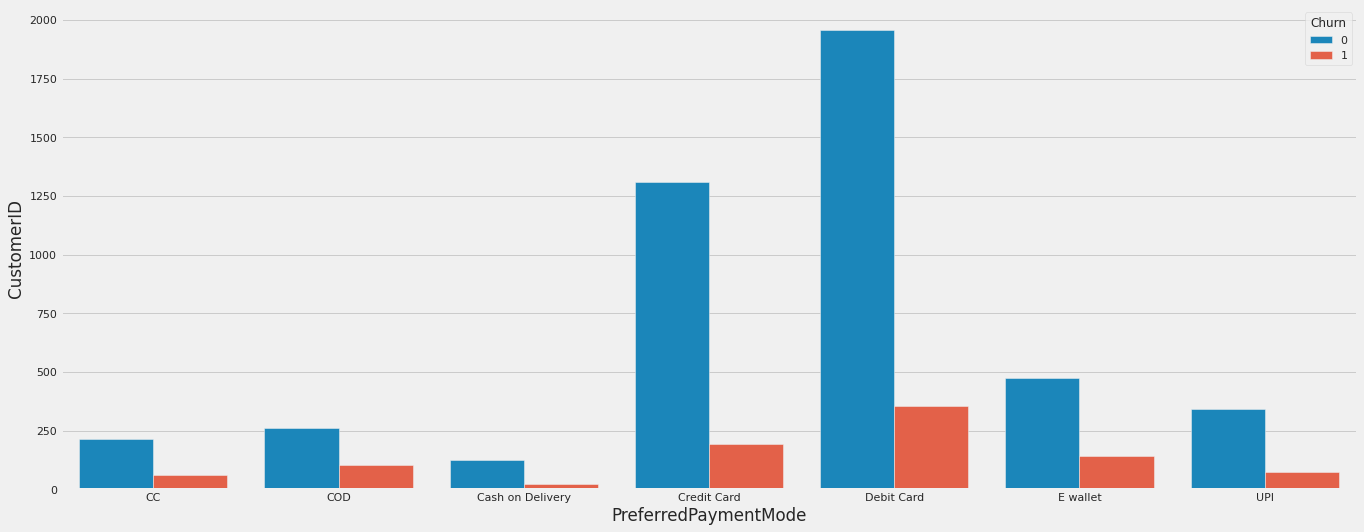

In [22]:
df10=df.groupby(['PreferredPaymentMode','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredPaymentMode', y ='CustomerID', hue='Churn', data=df10)

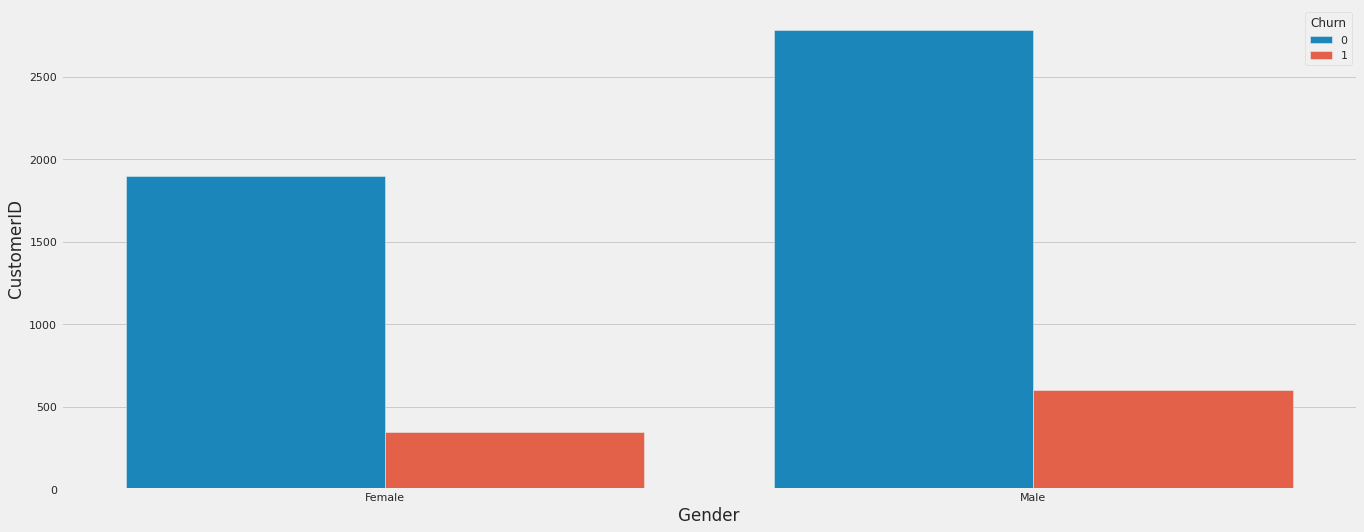

In [23]:
df11=df.groupby(['Gender','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='Gender', y ='CustomerID', hue='Churn', data=df11)

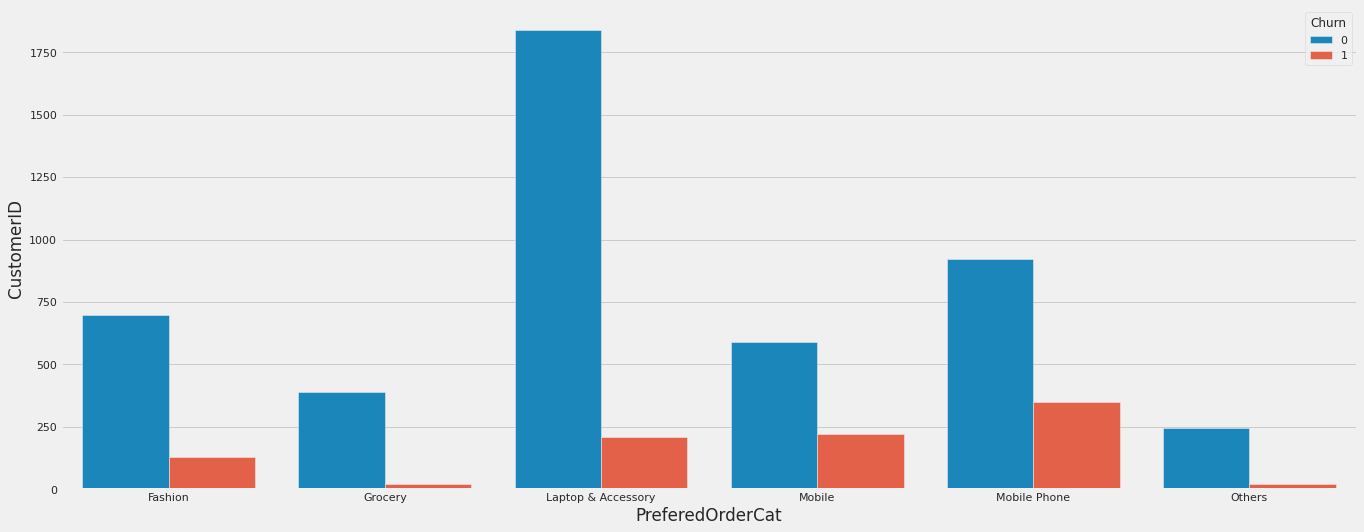

In [24]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12)

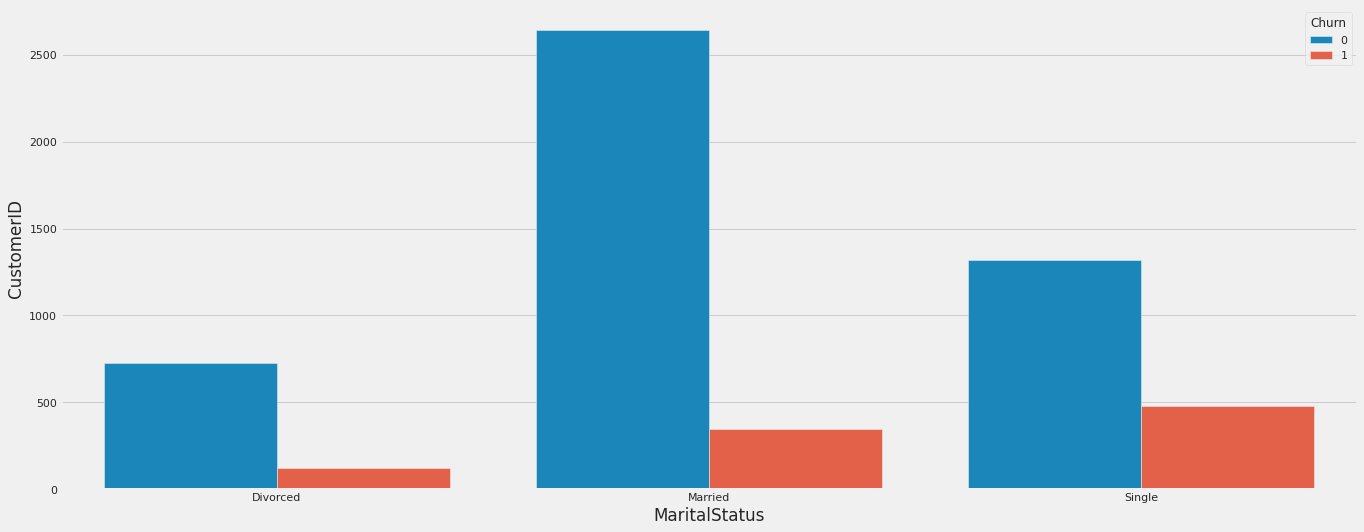

In [25]:
df13=df.groupby(['MaritalStatus','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='MaritalStatus', y ='CustomerID', hue='Churn', data=df13)

Dari visualisasi diatas, terlihat bahwa : 
1. Pada Fitur PreferredLoginDevice, Computer dan Mobile Phone memiliki potensi churn paling tinggi.
2. Pada Fitur PreferredPaymentMode, Debit Card memiliki potensi Churn paling tinggi 
3. Pada Fitur Gender, Male memiliki potensi churn paling tinggi 
4. Pada Fitur PreferredOrderCat, Mobile Phone memiliki potensi churn paling tinggi
5. Pada Fitur MaritalStatus, Single memiliki potensi Churn paling tinggi


## Business Insight

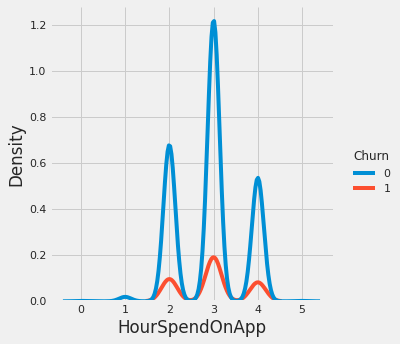

In [26]:
sns.displot(x='HourSpendOnApp', hue='Churn', data=df, kind='kde')

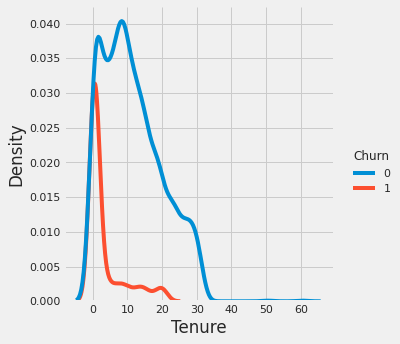

In [27]:
sns.displot(x='Tenure', hue='Churn', data=df, kind='kde')

#### Business Insight 1. 

Terdapat kolerasi yang cukup tinggi antara customerID dengan HourSpendOnApp. Namun, antara Churn dengan HourSpendOnApp memiliki kolerasi yang cukup lemah (dibawah 0,05). Hal tersebut menandakan bahwa customer yang membuka App dengan waktu yang lama belum tentu akan menjadi pembeli pada App. Berbanding terbalik dengan Tenure yang memiliki kolerasi yang cukup kuat. Hal tersebut mengartikan bahwa Tim Marketing bisa memfokuskan kepada customer yang sudah lama menggunakan App dalam pemberian promo agar bisa mempertahankan customer lama (bisa dikatakan loyal customer). Karena, customer baru bisa dikatakan sebagai One Time Buyer. 


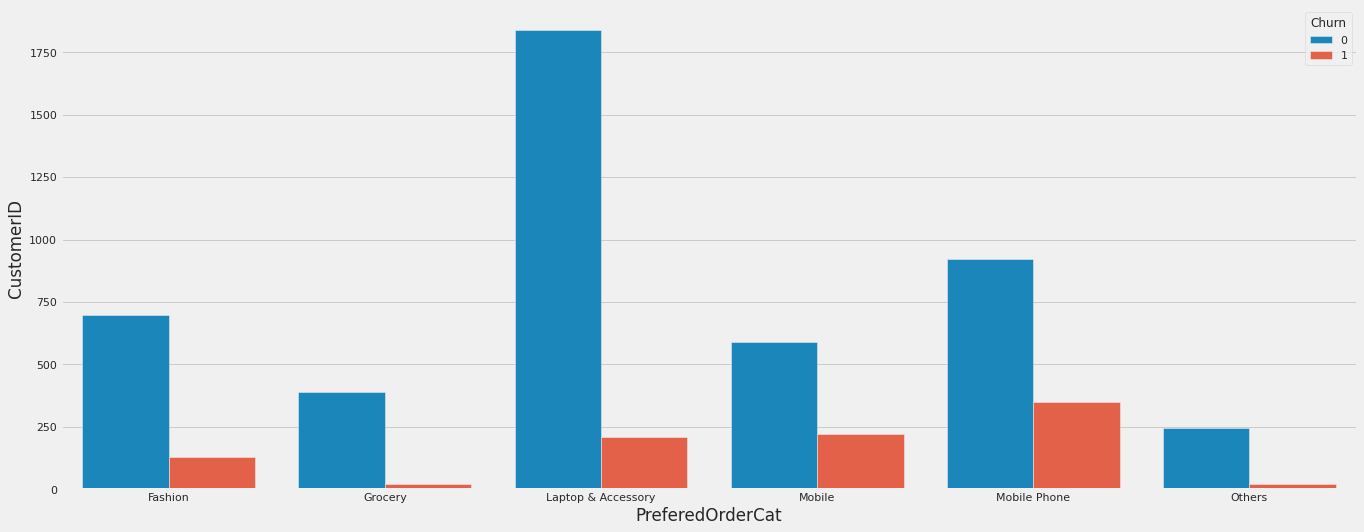

In [28]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12)

#### Business Insight 2. 

Dalam pemberian promo, Tim Marketing harus tepat sasaran dengan menyesuaikan dengan behavior (kemampuan belanja) customer. Salah satu contohnya bisa melihat dari PrefferedOrderCat. Misal customer yang memiliki kebiasaan untuk membeli produk Fashion, bisa diberikan promo yang berhubungan dengan produk Fashion. Sedangkan untuk customer yang memiliki kebiasaan untuk membeli produk Laptop & Accessory bisa diberikan promo yang berhubungan dengan produk Laptop & Accessory. Hal tersebut dapat mengurangi kemungkinan untuk Churn


#### Business Insight 3.
Melihat dari correlation heatmap, tingkat complain masih cenderung tinggi. oleh karena itu team marketing harus memantau komplain pelanggan secara berkala agar segera menindak lanjuti saat terjadi jika keluhan pelanggan di tangani secara, kemungkinan besar customer akan tetap loyal kepada aplikasi Bukapedia. Selain itu komplain pelanggan juga dapat menjadi peluang untuk meningkatkan produk dan layanan dan dapat meningkatkan SatisfactionRate.


# STAGE 2. E-Commerce Dataset #Bukapedia

## Handle Missing Value 

In [29]:
#melihat jumlah missing value
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [30]:
#melihat presentase missing value pada data 
missing_value = pd.DataFrame(df.isna().sum(), columns = ['Missing Values'])
missing_value['% Missing Values'] = df.isna().sum() / len(df)*100
missing_value = missing_value[missing_value['% Missing Values'] > 0]
missing_value

,Missing Values,% Missing Values
Tenure,264,4.689165
WarehouseToHome,251,4.458259
HourSpendOnApp,255,4.529307
OrderAmountHikeFromlastYear,265,4.706927
CouponUsed,256,4.547069
OrderCount,258,4.582593
DaySinceLastOrder,307,5.452931


In [31]:
# Jumlah baris sebelum missing value didrop
df.shape

(5630, 20)

In [32]:
df_drop=df.dropna()

In [33]:
# Jumlah baris setelah missing value didrop
df_drop.shape

(3774, 20)

Karena presentase missing value setiap kategori besar dan jika di drop data menjadi kehilangan sekitar 32% rows. Maka missing value tidak bisa di drop. Langkah selanjutnya yang digunakan adalah imputasi

In [34]:
#Statistika Summary Numerikal
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


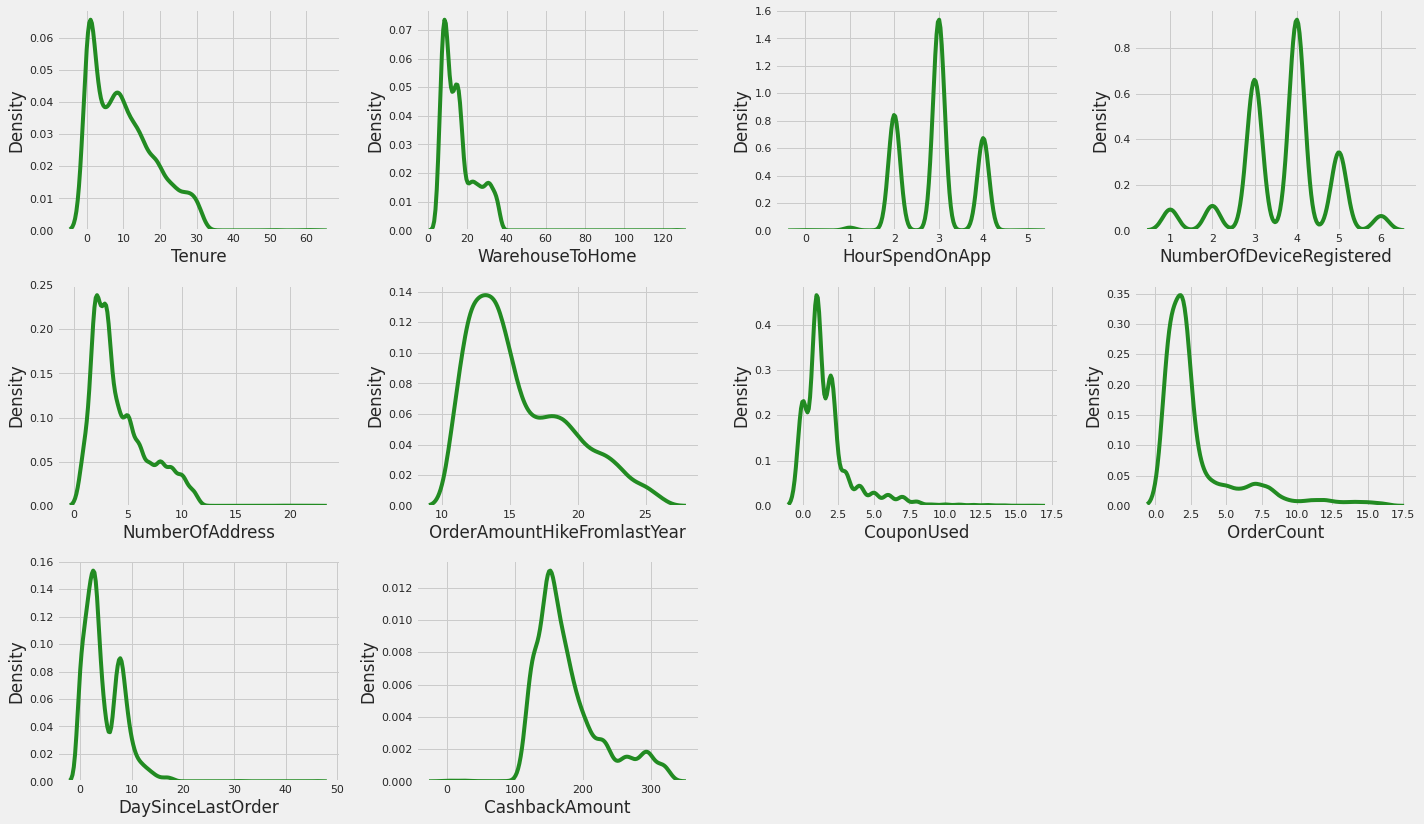

In [35]:
#Melihat behavior dari setiap fitur untuk menentukan jenis imputasi yang akan digunakan
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

Berdasarkan pengamatan diatas. Berikut adalah strategi kita mengatasi missing values pada setiap kolom. 

* `Tenure` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `WarehouseToHome` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `HourSpendOnApp` \: impute dengan nilai modus (karena merupakan data dengan jenis kategorik numerik)
* `OrderAmountHikeFromlastYear` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `CouponUsed` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `OrderCount` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `DaySinceLastOrder` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)

In [36]:
# impute missing value
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [37]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Handle Duplicated Data 

In [38]:
# cek jumlah duplicated rows dari semua kolom
df.duplicated().sum()

0

## Handle Outliers

In [39]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


Menghilangkan outlier dengan menggunakan Z-score

In [72]:
nums

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [69]:
df.sample(5)

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,log_WarehouseToHome,log_NumberOfAddress,log_OrderAmountHikeFromlastYear,log_OrderCount,log_CashbackAmount,norm_Tenure,norm_CouponUsed,norm_DaySinceLastOrder
4016,54017,1,Mobile Phone,3,E wallet,1,3.0,5,Laptop & Accessory,4,Single,1,2.197225,2.197225,2.564949,1.098612,5.411959,0.032258,0.428571,0.200000
825,50826,0,Computer,3,Debit Card,0,2.0,3,Fashion,3,Married,1,2.079442,0.693147,2.944439,2.197225,5.290890,0.129032,0.428571,0.400000
2783,52784,1,Computer,3,E wallet,1,2.0,3,Mobile Phone,5,Married,0,2.708050,0.693147,2.944439,0.000000,4.769837,0.290323,0.142857,0.000000
4281,54282,0,Computer,3,E wallet,1,4.0,4,Laptop & Accessory,4,Married,0,3.367296,0.693147,2.639057,0.693147,5.228217,0.225806,0.142857,0.533333
2605,52606,0,Computer,1,COD,1,3.0,3,Mobile,4,Single,0,2.397895,1.098612,2.639057,0.000000,4.845603,0.161290,0.142857,0.466667


## Feature Transformation

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,52802.826168,1627.280475,50001.0,51394.25,52784.50,54208.75,55630.00
Churn,5350.0,0.170467,0.376078,0.0,0.00,0.00,0.00,1.00
Tenure,5350.0,9.804112,8.178609,0.0,2.00,9.00,15.00,31.00
CityTier,5350.0,1.652710,0.913816,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5350.0,15.541308,8.066006,5.0,9.00,14.00,20.00,36.00
HourSpendOnApp,5350.0,2.929720,0.701942,1.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5350.0,3.675140,1.026057,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5350.0,3.056449,1.378802,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5350.0,4.196449,2.544520,1.0,2.00,3.00,6.00,11.00
Complain,5350.0,0.286355,0.452100,0.0,0.00,0.00,1.00,1.00


In [42]:
df['log_Tenure'] = np.log(df['Tenure'])
df['log_WarehouseToHome'] = np.log(df['WarehouseToHome'])
df['log_NumberOfAddress'] = np.log(df['NumberOfAddress'])
df['log_OrderAmountHikeFromlastYear'] = np.log(df['OrderAmountHikeFromlastYear'])
df['log_CouponUsed'] = np.log(df['CouponUsed'])
df['log_OrderCount'] = np.log(df['OrderCount'])
df['log_DaySinceLastOrder'] = np.log(df['DaySinceLastOrder'])
df['log_CashbackAmount'] = np.log(df['CashbackAmount'])

Melakukan feature transformation dengan metode log transformation karena fitur `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, dan `DaySinceLastOrder` mempunyai grafik yang skewed ke kanan (positively skew)

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,5.280283e+04,1627.280475,5.000100e+04,51394.250000,52784.500000,54208.750000,55630.000000
Churn,5350.0,1.704673e-01,0.376078,0.000000e+00,0.000000,0.000000,0.000000,1.000000
Tenure,5350.0,9.804112e+00,8.178609,0.000000e+00,2.000000,9.000000,15.000000,31.000000
CityTier,5350.0,1.652710e+00,0.913816,1.000000e+00,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5350.0,1.554131e+01,8.066006,5.000000e+00,9.000000,14.000000,20.000000,36.000000
HourSpendOnApp,5350.0,2.929720e+00,0.701942,1.000000e+00,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5350.0,3.675140e+00,1.026057,1.000000e+00,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5350.0,3.056449e+00,1.378802,1.000000e+00,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5350.0,4.196449e+00,2.544520,1.000000e+00,2.000000,3.000000,6.000000,11.000000
Complain,5350.0,2.863551e-01,0.452100,0.000000e+00,0.000000,0.000000,1.000000,1.000000


Setelah melakukan log transformation, fitur `Tenure`, `CouponUsed`, dan `DaySinceLastOrder` menghasilkan nilai mean dan min yang -inf. Jadi 3 fitur ini tidak dapat menggunakan metode log transformation.

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['norm_Tenure'] = MinMaxScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))
df['norm_CouponUsed'] = MinMaxScaler().fit_transform(df['CouponUsed'].values.reshape(len(df), 1))
df['norm_DaySinceLastOrder'] = MinMaxScaler().fit_transform(df['DaySinceLastOrder'].values.reshape(len(df), 1))

Karena tidak dapat menggunakan log transformation, fitur `Tenure`, `CouponUsed`, dan `DaySinceLastOrder` menggunakan metode normalization

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5350.0,5.280283e+04,1627.280475,5.000100e+04,51394.250000,52784.500000,54208.750000,55630.000000
Churn,5350.0,1.704673e-01,0.376078,0.000000e+00,0.000000,0.000000,0.000000,1.000000
Tenure,5350.0,9.804112e+00,8.178609,0.000000e+00,2.000000,9.000000,15.000000,31.000000
CityTier,5350.0,1.652710e+00,0.913816,1.000000e+00,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5350.0,1.554131e+01,8.066006,5.000000e+00,9.000000,14.000000,20.000000,36.000000
HourSpendOnApp,5350.0,2.929720e+00,0.701942,1.000000e+00,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5350.0,3.675140e+00,1.026057,1.000000e+00,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5350.0,3.056449e+00,1.378802,1.000000e+00,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5350.0,4.196449e+00,2.544520,1.000000e+00,2.000000,3.000000,6.000000,11.000000
Complain,5350.0,2.863551e-01,0.452100,0.000000e+00,0.000000,0.000000,1.000000,1.000000


Kesimpulan tahap feature transformation:
- Log Transformation: `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `OrderCount`, dan `CashbackAmount`
- Normalization: `Tenure`, `CouponUsed`, dan `DaySinceLastOrder`

In [46]:
# drop kolom yang sudah tidak digunakan
df = df.drop(columns=['log_Tenure', 'log_CouponUsed', 'log_DaySinceLastOrder', 'Tenure', 'WarehouseToHome', 'NumberOfAddress',
                      'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder', 'CashbackAmount'])

## Feature Encoding 

In [47]:
df.head(5)

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,log_WarehouseToHome,log_NumberOfAddress,log_OrderAmountHikeFromlastYear,log_OrderCount,log_CashbackAmount,norm_Tenure,norm_CouponUsed,norm_DaySinceLastOrder
0,50001,1,Mobile Phone,3,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,1,1.791759,2.197225,2.397895,0.0,5.074736,0.129032,0.142857,0.333333
1,50002,1,Phone,1,UPI,Male,3.0,4,Mobile,3,Single,1,2.079442,1.945910,2.708050,0.0,4.794964,0.290323,0.000000,0.000000
2,50003,1,Phone,1,Debit Card,Male,2.0,4,Mobile,3,Single,1,3.401197,1.791759,2.639057,0.0,4.789822,0.290323,0.000000,0.200000
3,50004,1,Phone,3,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0,2.708050,2.079442,3.135494,0.0,4.898362,0.000000,0.000000,0.200000
4,50005,1,Phone,1,CC,Male,3.0,3,Mobile,5,Single,0,2.484907,1.098612,2.397895,0.0,4.864453,0.000000,0.142857,0.200000


In [48]:
#melihat jumlah untuk setiap values dalam feature bertipe kategorikal
for col in cats:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    2587
Computer        1547
Phone           1216
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card          2195
Credit Card         1413
E wallet             579
UPI                  401
COD                  355
CC                   273
Cash on Delivery     134
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3214
Female    2136
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Laptop & Accessory    2000
Mobile Phone          1252
Mobile                 801
Fashion                752
Grocery                332
Others                 213
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2825
Single      1722
Divorced     803
Name: MaritalStatus, dtype: int64
------------

Dari values tersebut dapat ditentukan strategi encoding sebagai berikut :

*   Label Encoding : Gender (karena jumlah distinct value = 2)
*   One Hot Encoding : PreferredLoginDevice, PreferredPaymentMode, PreferedOrderCat, MaritalStatus 



In [49]:
# Mapping Gender
mapping_gender = {
    'Female' : 0,
    'Male' : 1
}

df['Gender'] = df['Gender'].map(mapping_gender)

In [50]:
#assign ke variabel baru
df_encode=df.copy()
df_encode.head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,log_WarehouseToHome,log_NumberOfAddress,log_OrderAmountHikeFromlastYear,log_OrderCount,log_CashbackAmount,norm_Tenure,norm_CouponUsed,norm_DaySinceLastOrder
0,50001,1,Mobile Phone,3,Debit Card,0,3.0,3,Laptop & Accessory,2,Single,1,1.791759,2.197225,2.397895,0.0,5.074736,0.129032,0.142857,0.333333
1,50002,1,Phone,1,UPI,1,3.0,4,Mobile,3,Single,1,2.079442,1.945910,2.708050,0.0,4.794964,0.290323,0.000000,0.000000
2,50003,1,Phone,1,Debit Card,1,2.0,4,Mobile,3,Single,1,3.401197,1.791759,2.639057,0.0,4.789822,0.290323,0.000000,0.200000
3,50004,1,Phone,3,Debit Card,1,2.0,4,Laptop & Accessory,5,Single,0,2.708050,2.079442,3.135494,0.0,4.898362,0.000000,0.000000,0.200000
4,50005,1,Phone,1,CC,1,3.0,3,Mobile,5,Single,0,2.484907,1.098612,2.397895,0.0,4.864453,0.000000,0.142857,0.200000


In [51]:
# One hot encoder untuk PreferredLoginDevice, PreferredPaymentMode, PreferedOrderCat, MaritalStatus

for cat in ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']:
    onehots = pd.get_dummies(df_encode[cat], prefix=cat)
    df_encode = df_encode.join(onehots)



In [52]:
# drop kolom yang sudah di-encoding
df_encode = df_encode.drop(columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'])
df_encode.head()

,CustomerID,Churn,CityTier,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,log_WarehouseToHome,log_NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,3,0,3.0,3,2,1,1.791759,2.197225,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,1,1,3.0,4,3,1,2.079442,1.945910,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,1,1,2.0,4,3,1,3.401197,1.791759,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,3,1,2.0,4,5,0,2.708050,2.079442,...,0,0,0,1,0,0,0,0,0,1
4,50005,1,1,1,3.0,3,5,0,2.484907,1.098612,...,0,0,0,0,1,0,0,0,0,1


In [53]:
#Mengecek apakah semua feature telah bertipe numerical
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5350 non-null   int64  
 1   Churn                                  5350 non-null   int64  
 2   CityTier                               5350 non-null   int64  
 3   Gender                                 5350 non-null   int64  
 4   HourSpendOnApp                         5350 non-null   float64
 5   NumberOfDeviceRegistered               5350 non-null   int64  
 6   SatisfactionScore                      5350 non-null   int64  
 7   Complain                               5350 non-null   int64  
 8   log_WarehouseToHome                    5350 non-null   float64
 9   log_NumberOfAddress                    5350 non-null   float64
 10  log_OrderAmountHikeFromlastYear        5350 non-null   float64
 11  log_

Kesimpulan pada tahap Feature Encoding :
- Terdapat 5 data yang bertipe kategorikal, yaitu Gender, PreferredLoginDevice, PreferredPaymentMode, PreferedOrderCat, dan MaritalStatus.
- Strategi encoding yang digunakan adalah **label encoding** (Gender) dan **One Hot Encoding**  (PreferredLoginDevice, PreferredPaymentMode, PreferedOrderCat, MaritalStatus).
- Setelah proses encoding, semua feature bertipe numerikal.

## Handle Class Imbalance 

In [54]:
df_encode['Churn'].value_counts()

0    4438
1     912
Name: Churn, dtype: int64

In [55]:
X = df_encode[[col for col in df_encode.columns if (str(df_encode[col].dtype) != 'object') and col not in ['Churn']]]
y = df_encode['Churn'].values
print(X.shape)
print(y.shape)

(5350, 34)
(5350,)


In [56]:
df_encode.isnull().any()

CustomerID                               False
Churn                                    False
CityTier                                 False
Gender                                   False
HourSpendOnApp                           False
NumberOfDeviceRegistered                 False
SatisfactionScore                        False
Complain                                 False
log_WarehouseToHome                      False
log_NumberOfAddress                      False
log_OrderAmountHikeFromlastYear          False
log_OrderCount                           False
log_CashbackAmount                       False
norm_Tenure                              False
norm_CouponUsed                          False
norm_DaySinceLastOrder                   False
PreferredLoginDevice_Computer            False
PreferredLoginDevice_Mobile Phone        False
PreferredLoginDevice_Phone               False
PreferredPaymentMode_CC                  False
PreferredPaymentMode_COD                 False
PreferredPaym

In [57]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

In [58]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    4438
1     912
dtype: int64
UNDERSAMPLING
0    1824
1     912
dtype: int64
OVERSAMPLING
0    4438
1    2219
dtype: int64
SMOTE
0    4438
1    2219
dtype: int64


## Feature Selection 

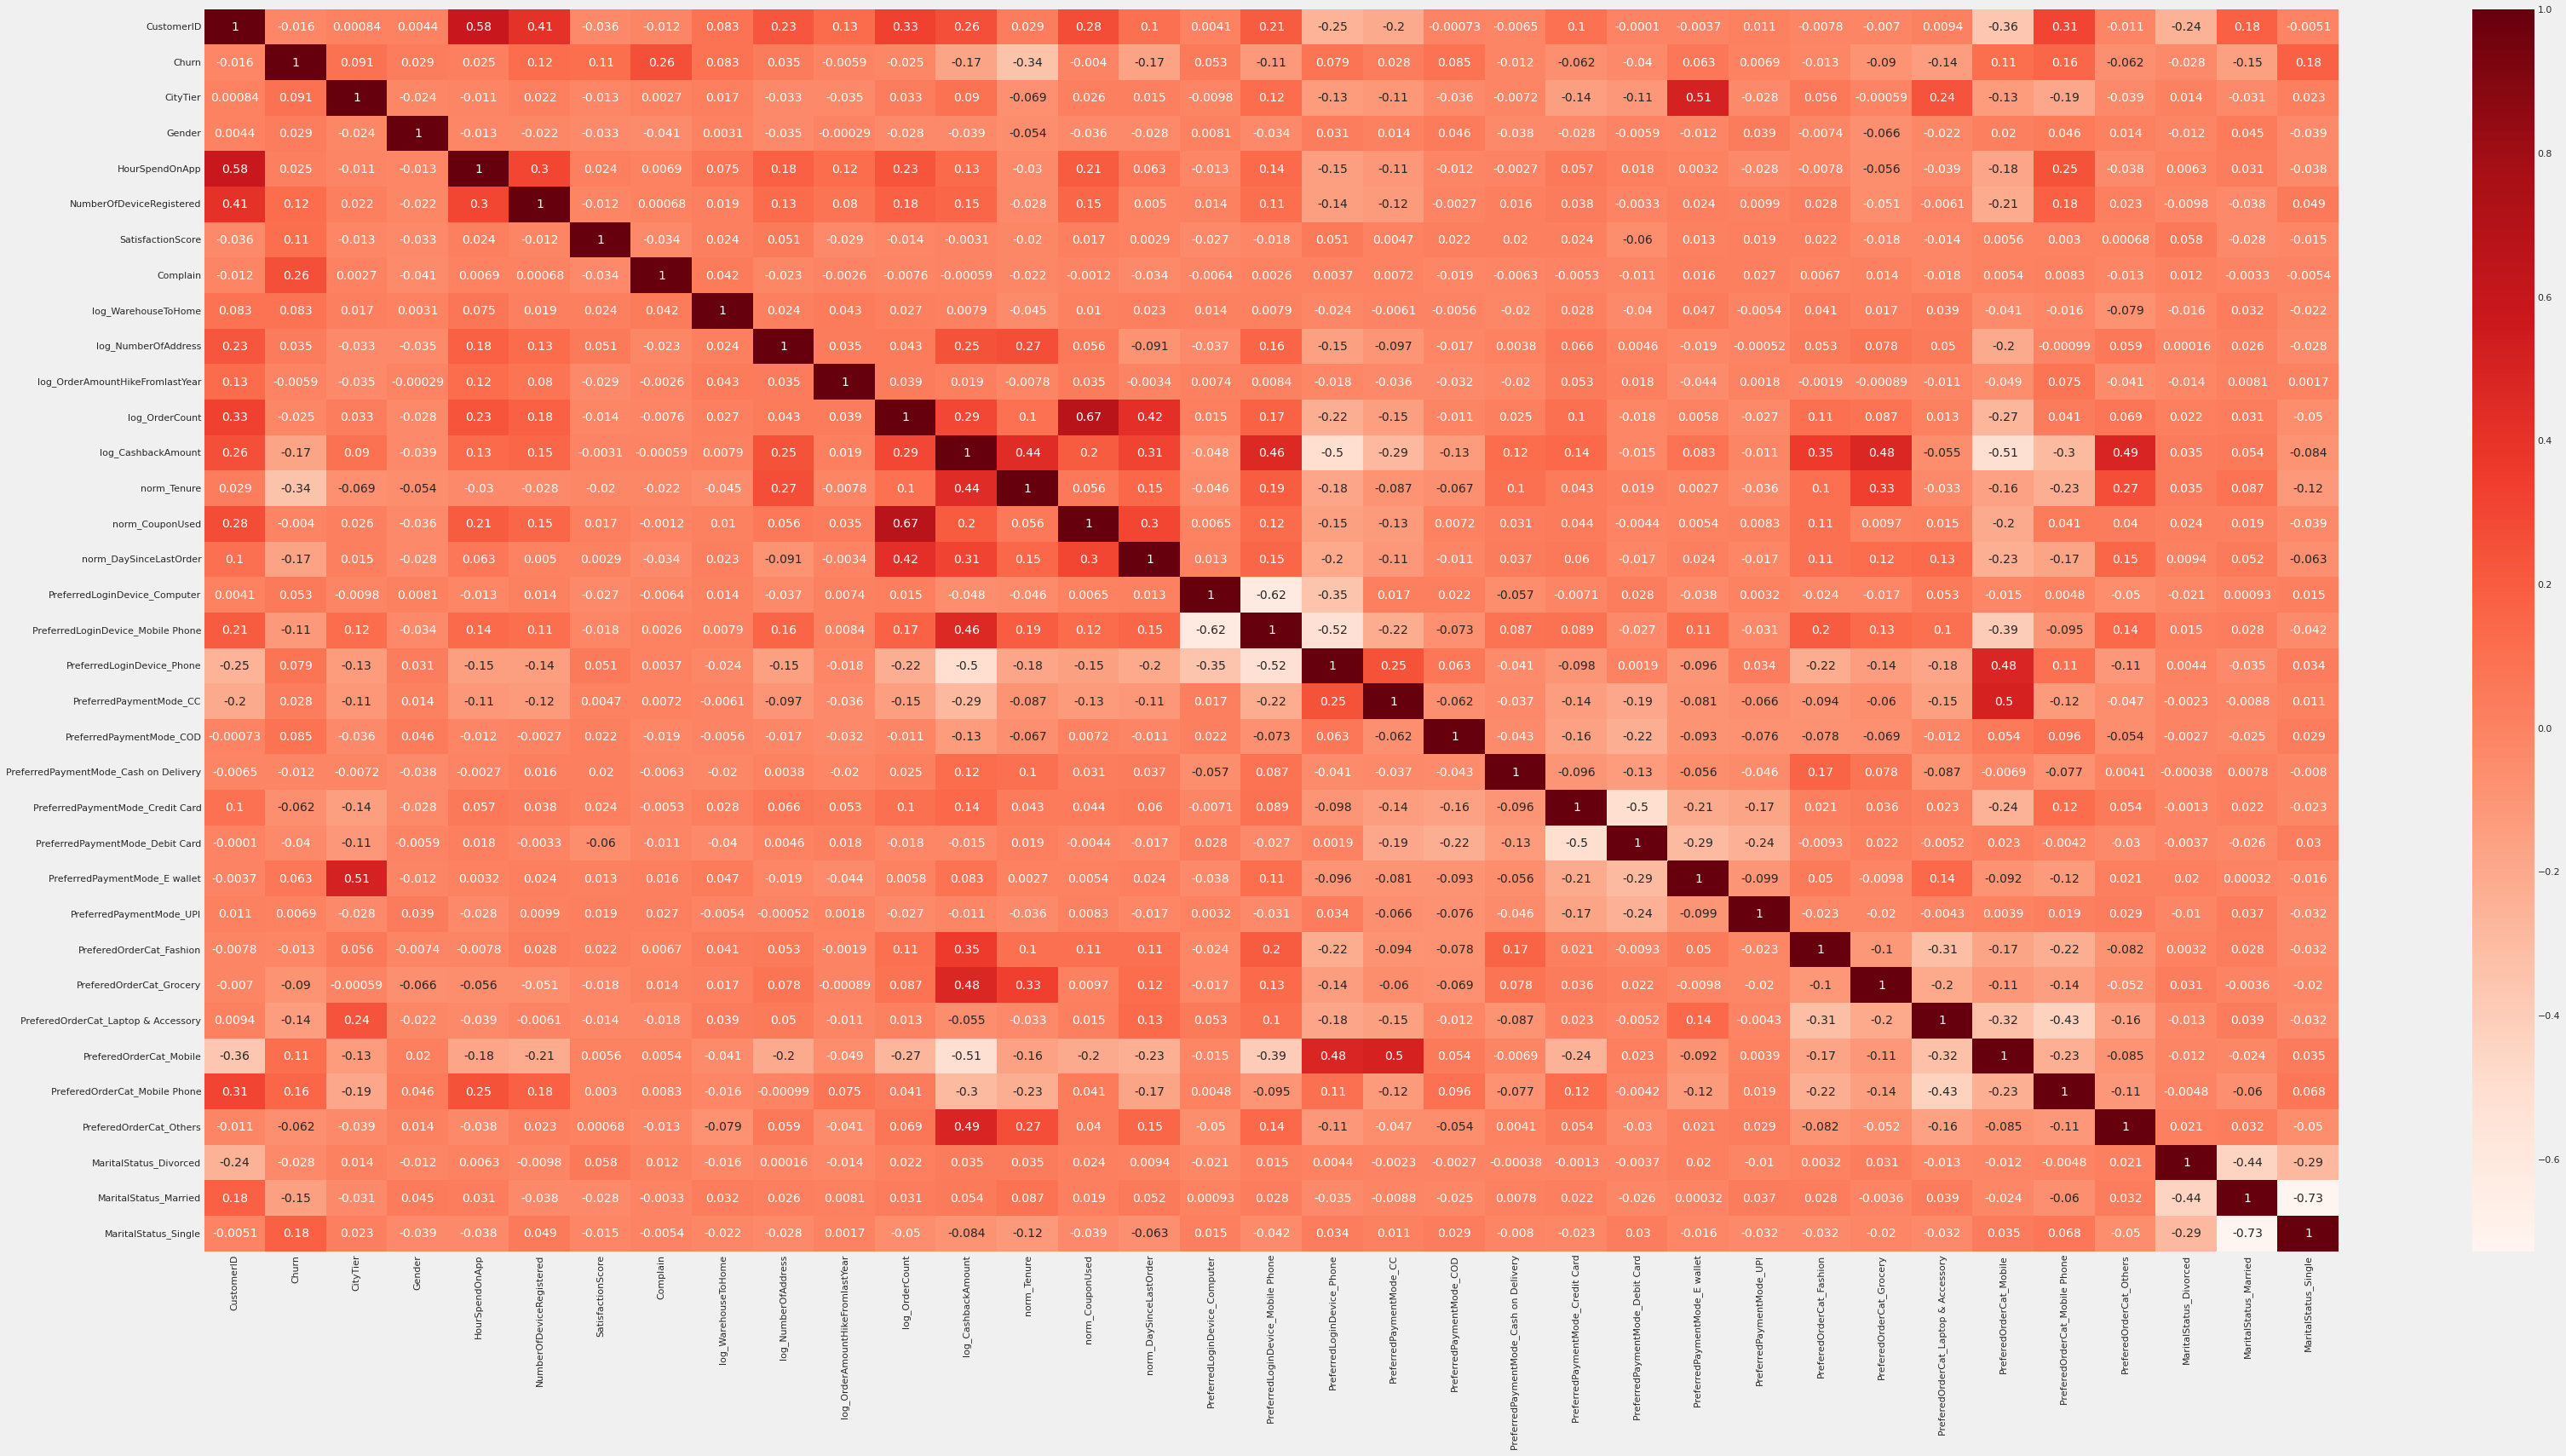

In [59]:
#Pearson Correlation (Correlation Coefficient)
plt.figure(figsize=(50,25))
cor = df_encode.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [60]:
# Data sebelum di lakukannya Feature Selection
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             5350 non-null   int64  
 1   Churn                                  5350 non-null   int64  
 2   CityTier                               5350 non-null   int64  
 3   Gender                                 5350 non-null   int64  
 4   HourSpendOnApp                         5350 non-null   float64
 5   NumberOfDeviceRegistered               5350 non-null   int64  
 6   SatisfactionScore                      5350 non-null   int64  
 7   Complain                               5350 non-null   int64  
 8   log_WarehouseToHome                    5350 non-null   float64
 9   log_NumberOfAddress                    5350 non-null   float64
 10  log_OrderAmountHikeFromlastYear        5350 non-null   float64
 11  log_

In [61]:
#Correlation with output variable
cor_target = abs(cor["Churn"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]

In [62]:
# Data Sesudah di lakukannya Feature Selection
df_encode_updated = df_encode.drop(columns=['CustomerID', 'Gender', 'HourSpendOnApp', 'norm_CouponUsed', 'PreferredPaymentMode_UPI', 'log_OrderAmountHikeFromlastYear',
                      'log_NumberOfAddress','PreferredPaymentMode_CC','PreferredPaymentMode_Cash on Delivery','PreferredPaymentMode_Debit Card', 'log_OrderCount','PreferedOrderCat_Fashion','MaritalStatus_Divorced'])
df_encode_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5350 non-null   int64  
 1   CityTier                             5350 non-null   int64  
 2   NumberOfDeviceRegistered             5350 non-null   int64  
 3   SatisfactionScore                    5350 non-null   int64  
 4   Complain                             5350 non-null   int64  
 5   log_WarehouseToHome                  5350 non-null   float64
 6   log_CashbackAmount                   5350 non-null   float64
 7   norm_Tenure                          5350 non-null   float64
 8   norm_DaySinceLastOrder               5350 non-null   float64
 9   PreferredLoginDevice_Computer        5350 non-null   uint8  
 10  PreferredLoginDevice_Mobile Phone    5350 non-null   uint8  
 11  PreferredLoginDevice_Phone    

## Feature Extraction

In [63]:
def segment(x):
    if x['SatisfactionScore'] > 3:
        segment = 'satisfied'
    elif x['SatisfactionScore'] >= 2 and x['SatisfactionScore'] <= 3:
        segment = 'neutral'
    else:
        segment = 'dissatisfied'
    return segment

df_encode_updated['satisfaction_group']=df_encode_updated.apply(lambda x: segment(x), axis=1)


In [64]:
df_encode_updated[['SatisfactionScore','satisfaction_group']]

,SatisfactionScore,satisfaction_group
0,2,neutral
1,3,neutral
2,3,neutral
3,5,satisfied
4,5,satisfied
...,...,...
5625,1,dissatisfied
5626,5,satisfied
5627,4,satisfied
5628,4,satisfied


In [65]:
df_encode_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5350 non-null   int64  
 1   CityTier                             5350 non-null   int64  
 2   NumberOfDeviceRegistered             5350 non-null   int64  
 3   SatisfactionScore                    5350 non-null   int64  
 4   Complain                             5350 non-null   int64  
 5   log_WarehouseToHome                  5350 non-null   float64
 6   log_CashbackAmount                   5350 non-null   float64
 7   norm_Tenure                          5350 non-null   float64
 8   norm_DaySinceLastOrder               5350 non-null   float64
 9   PreferredLoginDevice_Computer        5350 non-null   uint8  
 10  PreferredLoginDevice_Mobile Phone    5350 non-null   uint8  
 11  PreferredLoginDevice_Phone    

In [66]:
df_encode_updated.sample(5)

,Churn,CityTier,NumberOfDeviceRegistered,SatisfactionScore,Complain,log_WarehouseToHome,log_CashbackAmount,norm_Tenure,norm_DaySinceLastOrder,PreferredLoginDevice_Computer,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_E wallet,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,satisfaction_group
5175,0,1,4,5,0,2.079442,5.043167,0.258065,0.266667,1,...,0,0,0,0,0,1,0,1,0,satisfied
660,0,1,3,2,0,3.258097,5.314289,0.419355,0.066667,0,...,0,0,0,0,0,0,0,0,0,neutral
2544,0,1,3,3,0,3.465736,5.033505,0.290323,0.133333,0,...,0,0,0,1,0,0,0,1,0,neutral
4319,0,3,4,3,0,2.197225,4.992539,0.258065,0.200000,1,...,0,1,0,0,0,1,0,1,0,neutral
3189,0,3,4,3,0,2.708050,5.278319,0.225806,0.200000,0,...,0,1,0,1,0,0,0,1,0,neutral


In [67]:
mapping_satisfaction_group = {
    'dissatisfied' : 0,
    'neutral' : 1, 
    'satisfied' : 2
}

df_encode_updated['satisfaction_group'] = df_encode_updated['satisfaction_group'].map(mapping_satisfaction_group)

In [68]:
df_encode_updated.sample(5)

,Churn,CityTier,NumberOfDeviceRegistered,SatisfactionScore,Complain,log_WarehouseToHome,log_CashbackAmount,norm_Tenure,norm_DaySinceLastOrder,PreferredLoginDevice_Computer,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_E wallet,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,satisfaction_group
4281,0,3,4,4,0,3.367296,5.228217,0.225806,0.533333,1,...,0,1,0,1,0,0,0,1,0,2
4784,0,3,5,1,1,2.639057,5.456773,0.870968,0.333333,0,...,0,1,0,0,0,0,0,1,0,0
412,0,1,3,5,0,2.772589,5.236070,0.000000,0.466667,1,...,0,0,0,0,0,0,0,1,0,2
4300,1,1,4,5,0,2.772589,5.117994,0.032258,0.333333,0,...,1,0,0,0,0,1,0,0,1,2
2360,0,1,3,5,0,1.945910,4.867227,0.225806,0.200000,1,...,0,0,0,0,1,0,0,1,0,2


## 4 Feature Tambahan 
Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang
mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya
ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya
dan tidak perlu diimplementasikan)

-Age or Senior Citizen ( dapat membandingkan costumer yang churn berdasarkan umur)

-Internet Provider (membandingkan costumer yang churn berdasarkan internet provider yang mereka gunakan)

-Monthly Charges (membandingkan custumers yang churn berdasarkan biaya bulanan) 

-Dependents (membandingkan costumers yang churn berdasarkan tanggunganya)

